In [7]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import imghdr
import cv2

In [18]:
data_dir = "data_brain"
os.listdir(data_dir)
ds_store_file_location = ('data_brain/.DS_Store')
if os.path.isfile(ds_store_file_location):
    os.remove(ds_store_file_location)
os.listdir(data_dir)

['notumor', 'meningioma']

In [20]:
data_dir = 'data_brain'
image_exts = ['jpeg','jpg','bmp','png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img =cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image is not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))
            # os.remove(image_path)

Found 3645 files belonging to 2 classes.


2024-02-07 21:56:08.270491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3645]
	 [[{{node Placeholder/_4}}]]
2024-02-07 21:56:08.270622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3645]
	 [[{{node Placeholder/_4}}]]
2024-02-07 21:56:08.273956: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


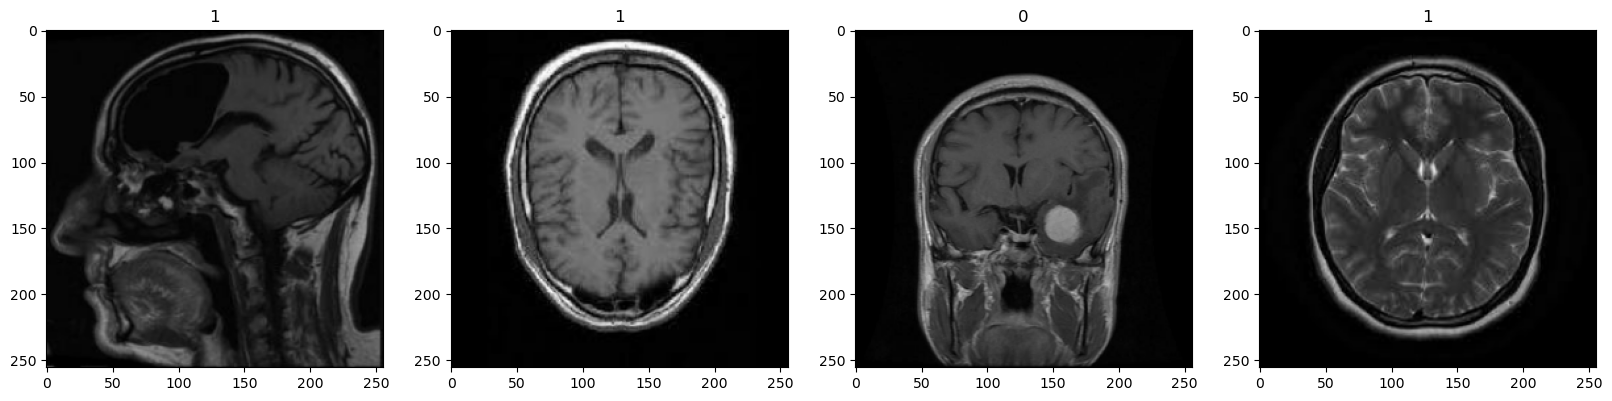

In [21]:

data = tf.keras.utils.image_dataset_from_directory('data_brain')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
len(data)

114

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

79

In [25]:
val_size

22

In [26]:
test_size

11

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-02-07 21:56:50.957076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3645]
	 [[{{node Placeholder/_0}}]]
2024-02-07 21:56:50.957358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3645]
	 [[{{node Placeholder/_4}}]]


79/79 [==============================] - ETA: 0s - loss: 9.2078 - accuracy: 0.7682

2024-02-07 21:57:06.056813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3645]
	 [[{{node Placeholder/_0}}]]
2024-02-07 21:57:06.056973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3645]
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 17s 214ms/step - loss: 9.2078 - accuracy: 0.7682 - val_loss: 0.3045 - val_accuracy: 0.8864
Epoch 2/20
79/79 [==============================] - 17s 219ms/step - loss: 0.1758 - accuracy: 0.9383 - val_loss: 0.1508 - val_accuracy: 0.9531
Epoch 3/20
79/79 [==============================] - 17s 218ms/step - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.1076 - val_accuracy: 0.9702
Epoch 4/20
79/79 [==============================] - 17s 218ms/step - loss: 0.0188 - accuracy: 0.9964 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 5/20
79/79 [==============================] - 18s 222ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0876 - val_accuracy: 0.9815
Epoch 6/20
79/79 [==============================] - 18s 227ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.1010 - val_accuracy: 0.9773
Epoch 7/20
79/79 [==============================] - 18s 228ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9830
Epoch 8/20

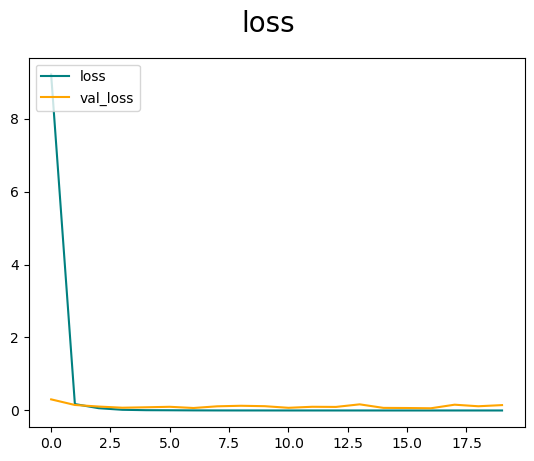

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

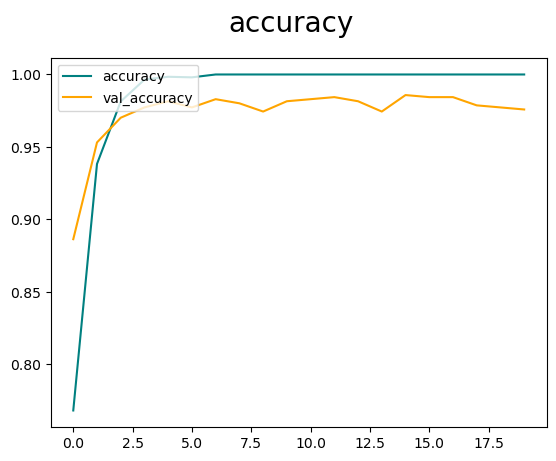

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-02-07 22:03:22.506043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3645]
	 [[{{node Placeholder/_0}}]]
2024-02-07 22:03:22.506750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3645]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 64ms/step


In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9794871807098389, Recall:0.9695431590080261, Accuracy:0.9715909361839294


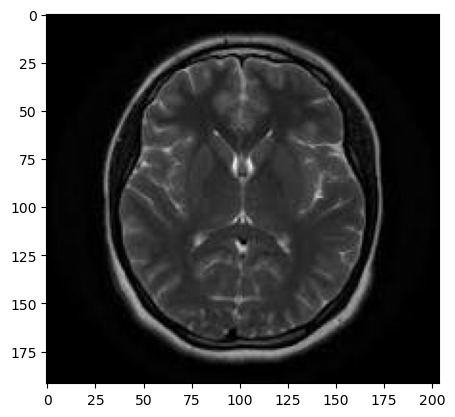

In [48]:
import cv2
img = cv2.imread('notumor_test.jpeg')
plt.imshow(img)
plt.show()

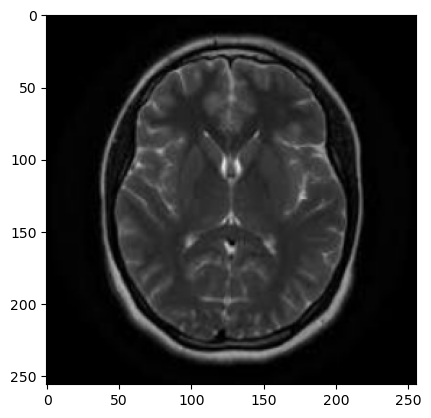

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 15ms/step


array([[0.8233457]], dtype=float32)

In [51]:
if yhat> 0.5:
    print(f'Predicted class is normal')
else:
    print(f'Predicted class is meningioma')

Predicted class is normal
